In [16]:
import numpy as np
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm

In [29]:
###get data
paths = glob.glob('/work/users/mi186veva/data_preprocessed/raw/*.npz')
print(len(paths))
X, y = [], []

for path in tqdm(paths):
    data = np.load(path)
    X_, y_ = data['X'], data['y']
    
    X += list(X_)
    y += list(y_)

X, y = np.array(X)[..., :-1], np.array(y)
print(X.shape, y.shape)

  0%|          | 0/56 [00:00<?, ?it/s]

56


100%|██████████| 56/56 [00:08<00:00,  6.85it/s]


(5791157, 91) (5791157,)


In [30]:
###scale

scaler_l2 = preprocessing.Normalizer().fit(X)
scaler_svn = preprocessing.StandardScaler().fit(X)
scaler_svn_t = preprocessing.StandardScaler().fit(X.T)

In [31]:
###transform

X_ = X[::10000]
X_l2, X_svn = scaler_l2.transform(X_), scaler_svn.transform(X_)

X_t = scaler_svn_t.transform(X.T).T[::10000]

In [32]:
y_ = y[::10000]
ill = y_ == 1
healthy = y_ == 0

Raw results


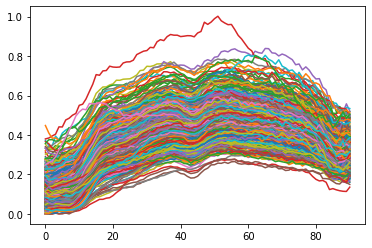

l2 results


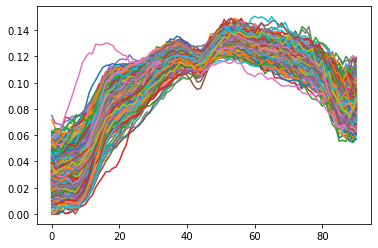

svn results


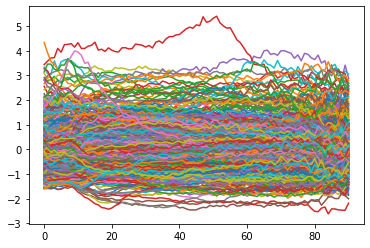

svn T results


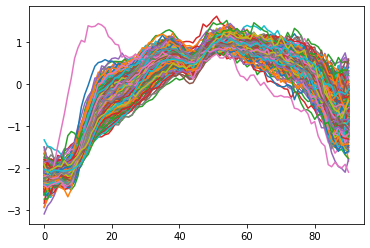

In [33]:
print('Raw results')
plt.plot(X_.T)
#plt.plot(X_[ill].T, c='r')
#plt.plot(X_[healthy].T, c='b')
plt.show()

print('l2 results')
plt.plot(X_l2.T)
#plt.plot(X_l2[ill].T, c='r')
#plt.plot(X_l2[healthy].T, c='b')
plt.show()

print('svn results')
plt.plot(X_svn.T)
#plt.plot(X_svn[ill].T, c='r')
#plt.plot(X_svn[healthy].T, c='b')
plt.show()

print('svn T results')
plt.plot(X_t.T)
#plt.plot(X_t[ill].T, c='r')
#plt.plot(X_t[healthy].T, c='b')
plt.show()
